In [1]:
!pip install mplsoccer
!pip install ScraperFC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ScraperFC as sfc
import pandas as pd
import mplsoccer
from mplsoccer import Pitch, VerticalPitch

Output()

In [3]:
scraper = sfc.Sofascore()

In [4]:
match_momentum=scraper.scrape_match_momentum('https://www.sofascore.com/fr/football/match/moghreb-atletico-tetuan-as-far-rabat/UMjsZax#id:13186583')

Running


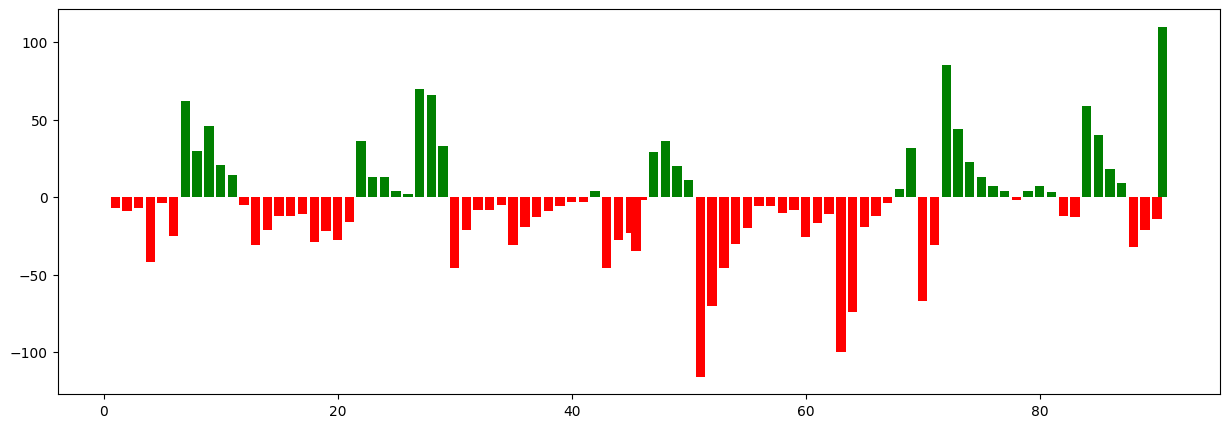

In [5]:
fig,ax = plt.subplots(figsize=(15,5))
match_momentum_home = match_momentum[match_momentum['value']>0]
match_momentum_away = match_momentum[match_momentum['value']<0]

plt.bar(match_momentum_home.minute, match_momentum_home.value, color='green')
plt.bar(match_momentum_away.minute, match_momentum_away.value, color='red')
plt.show()

In [25]:
URL = 'https://www.sofascore.com/fr/football/match/moghreb-atletico-tetuan-as-far-rabat/UMjsZax#id:13186583'
match_data = scraper.scrape_team_match_stats(URL)
team_names = scraper.get_team_names(URL)
shotmap = scraper.scrape_match_shots(URL)
heatmap = scraper.scrape_heatmaps(URL)

In [7]:
selected_columns = ['player', 'isHome', 'shotType', 'playerCoordinates', 'goalType']
shotmap_filtered = shotmap[selected_columns]
shotmap_filtered[['x', 'y','z']] = shotmap_filtered['playerCoordinates'].apply(pd.Series)
shotmap_filtered = shotmap_filtered.drop(columns=['playerCoordinates','z'])

<ipython-input-7-1266cf6d1623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotmap_filtered[['x', 'y','z']] = shotmap_filtered['playerCoordinates'].apply(pd.Series)
<ipython-input-7-1266cf6d1623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotmap_filtered[['x', 'y','z']] = shotmap_filtered['playerCoordinates'].apply(pd.Series)
<ipython-input-7-1266cf6d1623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Enter 'home' for Home team or 'away' for Away team: away


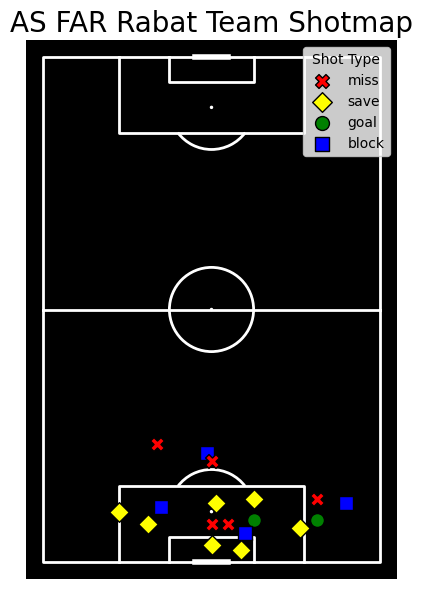

In [8]:
def create_shotmap(team_type='home'):
    is_home = True if team_type.lower() == 'home' else False
    team_data = shotmap_filtered[shotmap_filtered['isHome'] == is_home]


    markers = {
        'goal': 'o',
        'miss': 'X',
        'block': 's',
        'save': 'D',
        'post': '^',
    }
    colors = {
        'goal': 'green',
        'miss': 'red',
        'block': 'blue',
        'save': 'yellow',
        'post': 'purple',
    }

    # Create a figure for the pitch
    fig, ax = plt.subplots(figsize=(10, 7))
    pitch = VerticalPitch(line_color='white', pitch_color='black')
    pitch.draw(ax=ax)

    # Plot each shot
    for _, row in team_data.iterrows():
        marker = markers.get(row['shotType'], 'o')
        color = colors.get(row['shotType'], 'black')
        pitch.scatter(row['x'], row['y'], s=100, marker=marker, color=color, edgecolor='black', ax=ax,
                      label=row['shotType'] if row['shotType'] in markers else 'other')

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right', title='Shot Type')

    ax.set_title(f"{team_names[0] if is_home else team_names[1]} Team Shotmap", fontsize=20)
    plt.show()

# Input to select the team you want
team_type = input("Enter 'home' for Home team or 'away' for Away team: ").strip().lower()

# Call the function to generate the shotmap
create_shotmap(team_type=team_type)

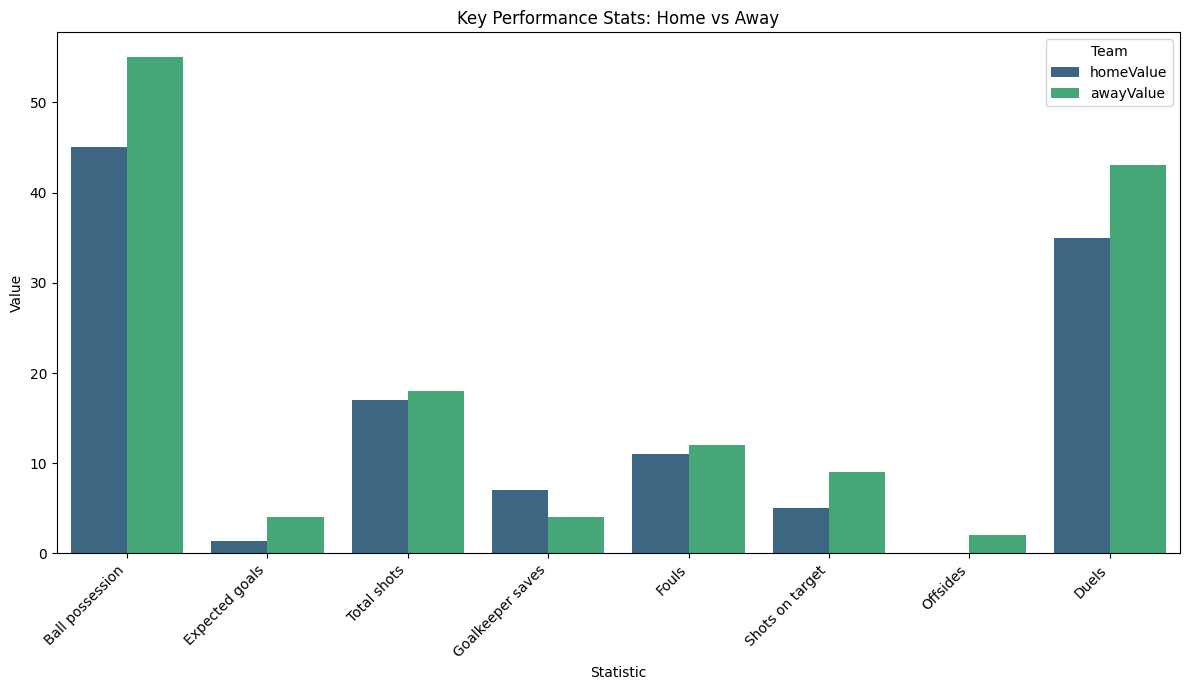

In [9]:
focus_stats = ['Ball possession', 'Expected goals', 'Total shots', 'Shots on target', 'Offsides', 'Duels', 'Fouls', 'Goalkeeper saves']

df_focus = match_data[match_data['name'].isin(focus_stats)][['name', 'homeValue', 'awayValue']]

df_melted = df_focus.melt(id_vars="name", value_vars=["homeValue", "awayValue"],
                          var_name="Team", value_name="Value")

plt.figure(figsize=(12, 7))
sns.barplot(x="name", y="Value", hue="Team", data=df_melted, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Key Performance Stats: Home vs Away")
plt.xlabel("Statistic")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [16]:
data = []

for player_name, player_data in heatmap.items():
    for x, y in player_data['heatmap']:
        data.append({'Player': player_name, 'x': x, 'y': y})

heatmap_df = pd.DataFrame(data)


In [17]:
heatmap_df

,Player,x,y
0,Mehdi El Jourbaoui,0,56
1,Mehdi El Jourbaoui,10,48
2,Mehdi El Jourbaoui,1,48
3,Mehdi El Jourbaoui,15,50
4,Mehdi El Jourbaoui,0,55
...,...,...,...
1417,Zakaria Ajoughlal,68,59
1418,Hatim Essaouabi,11,65
1419,Hatim Essaouabi,9,43
1420,Hatim Essaouabi,42,27


Available players:
1. Mehdi El Jourbaoui
2. Abdelilah Madkour
3. Yassine Amhih
4. Mohamed Rahim
5. Mohamed Cheikhi
6. Rochdi Oulad Abdelouahab
7. Zaid Ben Khajjou
8. Mohamed Kamal
9. Mohammad El Fakih
10. Abraham Wayo
11. Hamza Darai
12. Moad  Karmoun
13. Bilal El Megri
14. Diae Eddine Eddaoudi
15. Imad El Rahouli
16. Reda Hajhouj
17. El Mehdi Benabid
18. Et-Tayeb Boukhriss
19. Hassan Houbeib
20. Henoc Inonga
21. Akram Nakach
22. Anas Bach
23. Zinedine Derrag
24. Ahmed Hammoudan
25. Khalid Ait Ouarkhane
26. Mahmoud Benhalib
27. Tumisang Orebonye
28. Amine Zouhzouh
29. Youssef El Fahli
30. Mohamed Rabie Hrimat
31. Zakaria Ajoughlal
32. Hatim Essaouabi
Select a player (enter the number): 25


/usr/local/lib/python3.11/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




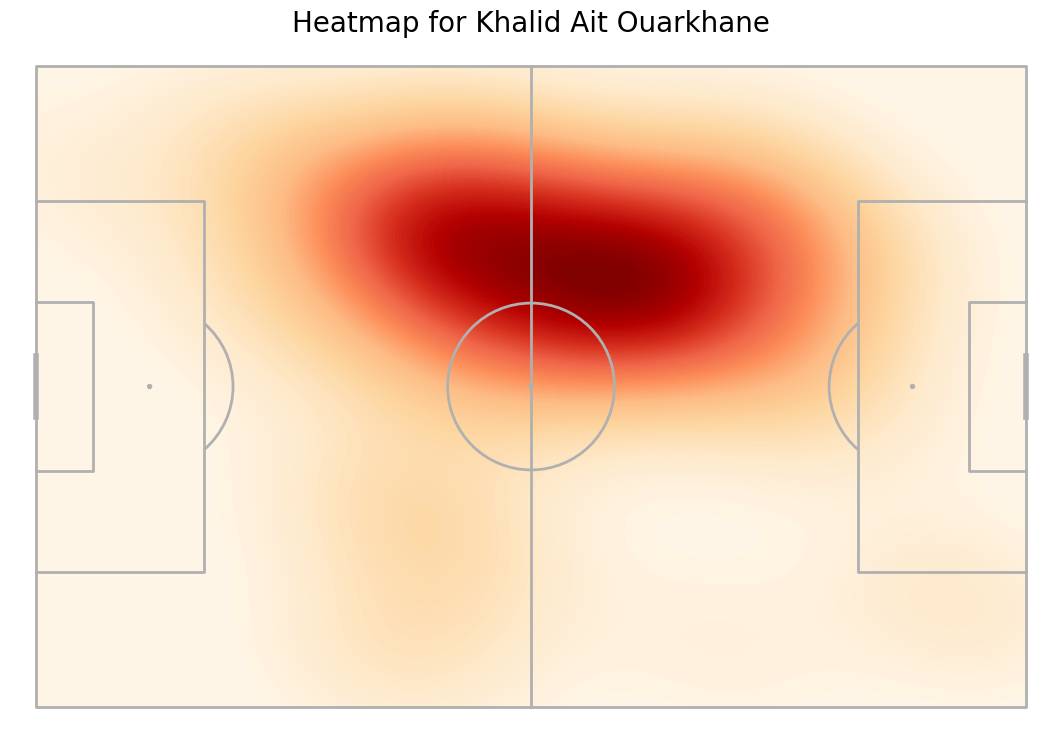

In [ ]:
print("Available players:")
for i, player in enumerate(heatmap_df['Player'].unique(), 1):
    print(f"{i}. {player}")

player_choice = int(input("Select a player (enter the number): "))
selected_player = heatmap_df['Player'].unique()[player_choice - 1]
filtered_data = heatmap_df[heatmap_df['Player'] == selected_player]

fig, ax = plt.subplots(figsize=(16, 9))

cmap = 'hot'
pitch = Pitch(pitch_type='opta')
pitch.draw(ax=ax)
pitch.kdeplot(filtered_data.x, filtered_data.y, ax=ax, levels=100, shade=True, zorder=-1, shade_lowest=True, cmap='OrRd')

ax.set_title(f"Heatmap for {selected_player}", fontsize=20)
plt.show()